In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing dataset
from tensorflow.keras.datasets import fashion_mnist

In [3]:
#loading dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_test.shape

(10000,)

In [8]:
np.max(x_train)

255

In [9]:
np.min(x_train)

0

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
np.max(y_train), np.min(y_train)

(9, 0)

In [12]:
class_names = ['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle Boot']
print(class_names)

['0 Top/T-shirt', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle Boot']


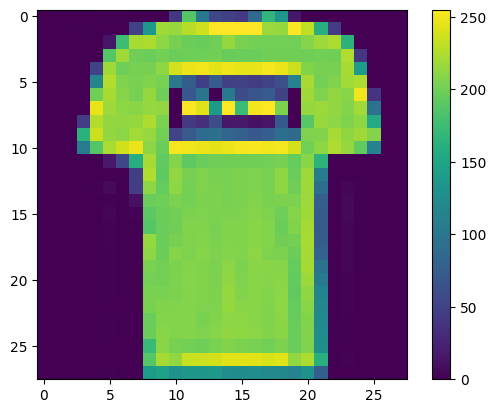

In [13]:
#Data Exploration
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [14]:
y_train[1]

0

In [15]:
#Normalizing the dataset
x_train = x_train/255.0
x_test = x_test/255.0

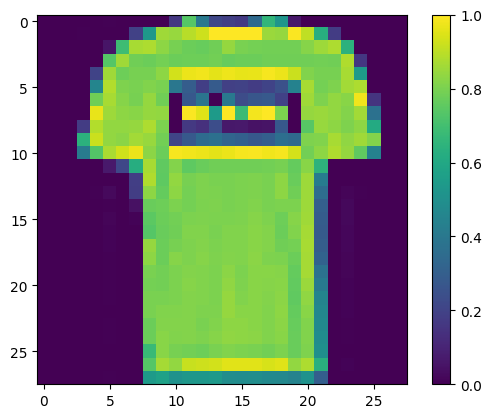

In [16]:
plt.figure()
plt.imshow(x_train[1])
plt.colorbar()

In [17]:
#Flattening the dataset
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [18]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [19]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [20]:
#Building the model

#Define an object
model = tf.keras.models.Sequential()
#sequence of layers

In [21]:
#First layer
# 1) units(No of neurons) = 128
# 2) activation function = relu
# 3) input shape = 784

model.add(tf.keras.layers.Dense(units = 128, activation = 'relu', input_shape = (784,)))

In [22]:
#adding second layer with dropout
model.add(tf.keras.layers.Dropout(0.3))
#prevents overfitting

In [23]:
#output layer
model.add(tf.keras.layers.Dense(units = 10, activation = 'softmax'))

In [24]:
#Building the model

#optimizer - minimizes the loass function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [26]:
#Training the model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 3ms/step - loss: 0.5515 - sparse_categorical_accuracy: 0.8061
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4169 - sparse_categorical_accuracy: 0.8478
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3861 - sparse_categorical_accuracy: 0.8595
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3632 - sparse_categorical_accuracy: 0.8665
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3494 - sparse_categorical_accuracy: 0.8714
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3388 - sparse_categorical_accuracy: 0.8747
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3303 - sparse_categorical_accuracy: 0.8770
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3185 - sparse_categorical_accuracy: 0.8819
Epoch 9/10
1875/1875 [=========

In [27]:
#model evaluation and prediction
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3427 - sparse_categorical_accuracy: 0.8777


In [28]:
print(test_loss)
print(test_accuracy)

0.3426784873008728
0.8776999711990356


In [41]:
#Model prediction
y_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 [==============================] - 1s 5ms/step


In [42]:
print(y_pred)

[9 2 1 ... 8 1 5]


In [43]:
y_pred[110], y_test[110]

(2, 2)

In [44]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[875   2  13  20   5   1  76   0   8   0]
 [  3 970   1  18   3   0   2   0   3   0]
 [ 15   1 757  10 138   0  79   0   0   0]
 [ 25  10   7 881  43   0  30   0   4   0]
 [  0   0  75  29 856   0  39   0   1   0]
 [  0   0   0   1   0 955   0  25   1  18]
 [168   0  83  33 101   0 602   0  13   0]
 [  0   0   0   0   0  15   0 966   0  19]
 [  3   0   5   6   4   1   5   5 971   0]
 [  0   0   0   0   0   5   1  50   0 944]]


In [46]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.8777
